In [6]:
# import all the libraries
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import matplotlib.pyplot as plt
import numpy as np

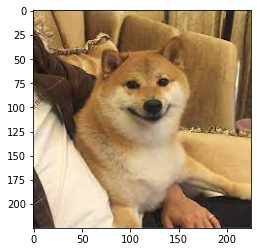

In [7]:
# image opening
image = Image.open("puppy.jpg")
# this open the photo viewer
image.show()
plt.imshow(image)

In [8]:
# text Watermark
watermark_image = image.copy()

In [9]:
draw = ImageDraw.Draw(watermark_image)
# ("font type",font size)
font = ImageFont.truetype("arial.ttf", 50)

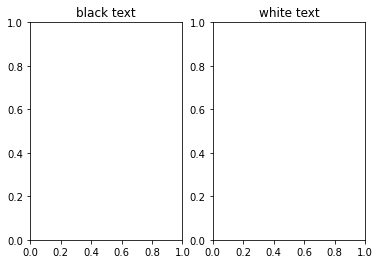

In [10]:

# add Watermark
# (0,0,0)-black color text
draw.text((0, 0), "puppy", (0, 0, 0), font=font)
plt.subplot(1, 2, 1)
plt.title("black text")
watermark_image.show()
# add Watermark
# (255,255,255)-White color text
draw.text((0, 0), "puppy", (255, 255, 255), font=font)
plt.subplot(1, 2, 2)
plt.title("white text")
watermark_image.show()

In [11]:
################################################

In [17]:
import cv2
img = cv2.imread('w.JPG')
watermark = cv2.imread("water.png")

In [18]:
percent_of_scaling = 20
new_width = int(img.shape[1] * percent_of_scaling/100)
new_height = int(img.shape[0] * percent_of_scaling/100)
new_dim = (new_width, new_height)
resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_AREA)

wm_scale = 40
wm_width = int(watermark.shape[1] * wm_scale/100)
wm_height = int(watermark.shape[0] * wm_scale/100)
wm_dim = (wm_width, wm_height)

In [19]:
resized_wm = cv2.resize(watermark, wm_dim, interpolation=cv2.INTER_AREA)

In [20]:
h_img, w_img, _ = resized_img.shape
center_y = int(h_img/2)
center_x = int(w_img/2)
h_wm, w_wm, _ = resized_wm.shape
top_y = center_y - int(h_wm/2)
left_x = center_x - int(w_wm/2)
bottom_y = top_y + h_wm
right_x = left_x + w_wm

roi = resized_img[top_y:bottom_y, left_x:right_x]
result = cv2.addWeighted(roi, 1, resized_wm, 0.3, 0)
resized_img[top_y:bottom_y, left_x:right_x] = result

filename = 'Watermakred_Image.jpg'
cv2.imwrite(filename, resized_img)
cv2.imshow("Resized Input Image", resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()